In [35]:
import numpy as np
import pandas as pd
import os
import cv2
import keras

import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
%matplotlib inline
K.set_image_dim_ordering('th')

In [36]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

(28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


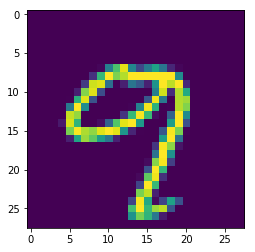

In [37]:
# To stop potential randomness
seed = 12
rng = np.random.RandomState(seed)
img_name = rng.choice(train.filename)
filepath = os.path.join('images', 'train', img_name)

img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print(img.shape)
print(img[0])

In [38]:
temp = []
for img_name in train.filename:
    image_path = os.path.join('images', 'train', img_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)
# reshape to be [samples][pixels][width][height]
train_x=train_x.reshape(train_x.shape[0], 1,28, 28).astype('float32')

In [39]:
temp_test = []
for img_name_test in test.filename:
    image_path_test = os.path.join('images' ,'test', img_name_test)
    img_test = cv2.imread(image_path_test, cv2.IMREAD_GRAYSCALE)
    img_test = img_test.astype('float32')
    temp_test.append(img_test)
    
test_x = np.stack(temp_test)
# reshape to be [samples][pixels][width][height]
test_x=test_x.reshape(test_x.shape[0], 1,28, 28).astype('float32')

In [40]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


num_classes =y_test.shape[1]
print(X_train.shape)
print(y_train)

(39200, 1, 28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1,28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
#model=larger_model()
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
#scores = model.evaluate(X_train, y_train, verbose=0)
#print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [32]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
predictions = model.predict_classes(test_x)

In [34]:
predictions

array([4, 0, 9, ..., 6, 6, 2], dtype=int64)

In [67]:
#training with full data
train_x = train_x / 255
test_x=test_x/255
print(train_x.shape)
print(train_y)

(49000, 1, 28, 28)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]


In [68]:
#model training
model_final=larger_model()
model_final.fit(train_x, train_y, validation_data=(train_x, train_y), epochs=10, batch_size=200)
# Final evaluation of the model
scores_final = model_final.evaluate(train_x, train_y, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_final[1]*100))

Train on 49000 samples, validate on 49000 samples
Epoch 1/10
49000/49000 [==============================] - 172s 4ms/step - loss: 0.4630 - acc: 0.8577 - val_loss: 0.1009 - val_acc: 0.9701
Epoch 2/10
49000/49000 [==============================] - 178s 4ms/step - loss: 0.1105 - acc: 0.9660 - val_loss: 0.0676 - val_acc: 0.9798
Epoch 3/10
49000/49000 [==============================] - 176s 4ms/step - loss: 0.0788 - acc: 0.9754 - val_loss: 0.0468 - val_acc: 0.9853
Epoch 4/10
49000/49000 [==============================] - 176s 4ms/step - loss: 0.0662 - acc: 0.9790 - val_loss: 0.0406 - val_acc: 0.9874
Epoch 5/10
49000/49000 [==============================] - 176s 4ms/step - loss: 0.0555 - acc: 0.9825 - val_loss: 0.0332 - val_acc: 0.9895
Epoch 6/10
49000/49000 [==============================] - 176s 4ms/step - loss: 0.0483 - acc: 0.9843 - val_loss: 0.0290 - val_acc: 0.9908
Epoch 7/10
49000/49000 [==============================] - 168s 3ms/step - loss: 0.0429 - acc: 0.9861 - val_loss: 0.0229 - 

In [69]:
# serialize model to JSON
model_json = model_final.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_final.save_weights("model_final.h5")
print("Saved model to disk")

Saved model to disk


In [71]:
predictions = model_final.predict_classes(test_x)

submissions=pd.DataFrame({"ImageId": list(test['filename']),
                         "Label": predictions})
submissions.to_csv("test_predictions.csv", index=False, header=True)

In [72]:
predictions

array([4, 0, 9, ..., 6, 6, 2], dtype=int64)